In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.python.framework.ops import disable_eager_execution
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.neighbors._kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#disable_eager_execution()

#Import Data and Preprocessing

---

In [5]:
!wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip


--2023-08-21 06:54:39--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ECG5000.zip’

ECG5000.zip             [ <=>                ]  20.85K  --.-KB/s    in 0.1s    

2023-08-21 06:54:40 (165 KB/s) - ‘ECG5000.zip’ saved [21350]

Archive:  ECG5000.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ECG5000.zip or
        ECG5000.zip.zip, and cannot find ECG5000.zip.ZIP, period.


In [8]:
!unzip /content/ECG5000.zip

Archive:  /content/ECG5000.zip
  inflating: ECG5000.txt             
  inflating: ECG5000_TEST.arff       
  inflating: ECG5000_TEST.txt        
  inflating: ECG5000_TRAIN.arff      
  inflating: ECG5000_TRAIN.txt       
  inflating: ECG5000_TEST.ts         
  inflating: ECG5000_TRAIN.ts        


In [9]:
!cat ECG5000_TRAIN.txt ECG5000_TEST.txt >ecg_final.txt

In [10]:
!head ecg_final.txt

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [11]:
df=pd.read_csv('ecg_final.txt',sep='  ',header=None)
df=df.add_prefix('c')
df['c0']=df['c0'].apply(lambda x: 1 if(x>1) else 0)

<ipython-input-11-8bd9a67923b2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('ecg_final.txt',sep='  ',header=None)


In [12]:
train_data,test_data,train_labels,test_labels=train_test_split(df.values,df.values[:,0:1],test_size=0.2, random_state=111)
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled=data_scaled.transform(test_data)

In [13]:
normal_train_data=train_data_scaled[train_data_scaled[:,0]==0]
anomaly_train_data=train_data_scaled[train_data_scaled[:,0]==1]

In [16]:
normal_test_data=test_data_scaled[test_data_scaled[:,0]==0]
anomaly_test_data=test_data_scaled[test_data_scaled[:,0]==1]

In [17]:
# убираем лейблы
normal_train_data=normal_train_data[:,1:]
anomaly_train_data=anomaly_train_data[:,1:]
normal_test_data=normal_test_data[:,1:]
anomaly_test_data=anomaly_test_data[:,1:]

In [20]:
train_data_scaled=train_data_scaled[:,1:]
test_data_scaled=test_data_scaled[:,1:]

In [21]:
normal_train_data= normal_train_data.reshape(len(normal_train_data), normal_train_data.shape[1],1)
anomaly_train_data= anomaly_train_data.reshape(len(anomaly_train_data), anomaly_train_data.shape[1],1)
train_data_scaled = train_data_scaled.reshape(len(train_data_scaled), train_data_scaled.shape[1],1)
test_data_scaled= test_data_scaled.reshape(len(test_data_scaled), test_data_scaled.shape[1],1)
normal_test_data= normal_test_data.reshape(len(normal_test_data), normal_test_data.shape[1],1)
anomaly_test_data= anomaly_test_data.reshape(len(anomaly_test_data), anomaly_test_data.shape[1],1)
test_data_scaled.shape

(1000, 140, 1)

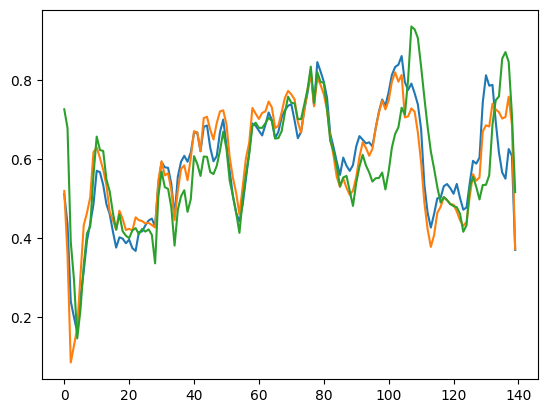

In [23]:
plt.plot(normal_test_data[0])
plt.plot(normal_test_data[1])
plt.plot(normal_test_data[2])

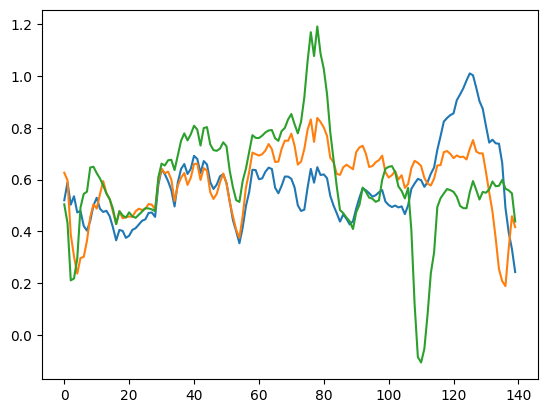

In [24]:
plt.plot(anomaly_test_data[0])
plt.plot(anomaly_test_data[1])
plt.plot(anomaly_test_data[2])

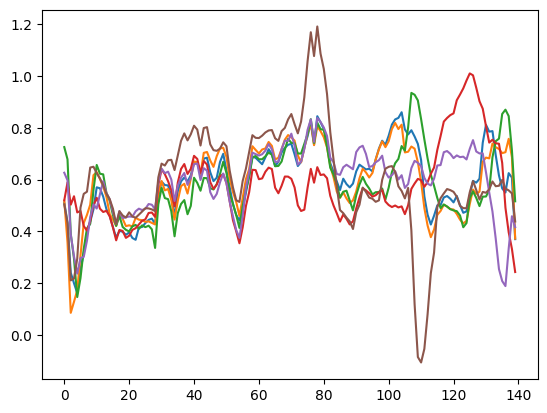

In [22]:
plt.plot(normal_test_data[0])
plt.plot(normal_test_data[1])
plt.plot(normal_test_data[2])
plt.plot(anomaly_test_data[0])
plt.plot(anomaly_test_data[1])
plt.plot(anomaly_test_data[2])

#Design the Transformer-based Autoencoder

---

In [25]:
input_data = keras.Input(shape=(normal_train_data.shape[1]))

In [26]:
num_classes = 6
input_shape =input_data
learning_rate = 0.01
weight_decay = 0.001
batch_size = 56
num_epochs = 500
image_size = 90  # We'll resize input images to this size
patch_size = 188  # Size of the patches to be extract from the input images
num_patches = 1
projection_dim = 10
num_heads =2
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers

In [27]:
transformer_layers = 2
mlp_head_units = [10]  # Size of the dense layers of the final classifier
#choose the way you want to agument

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Normalization(),
        #layers.experimental.preprocessing.Resizing(x_train.shape[1],1),
        #layers.experimental.preprocessing.RandomFlip("horizontal"),
        #layers.experimental.preprocessing.RandomRotation(factor=0.02),
        #layers.experimental.preprocessing.RandomZoom(
         #   height_factor=0.2, width_factor=0.2
        #),
    ],
    name="data_augmentation",
)

In [33]:
# Compute the mean and the variance of the training data for normalization.
#data_augmentation.layers[0].adapt(x_train)
#feeedforward network
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [32]:
tf.keras.utils.register_keras_serializable()

<function keras.saving.object_registration.register_keras_serializable.<locals>.decorator(arg)>

In [34]:
#Patch Encoder
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim=6,name=None,**kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
    def build(self,input_shape):
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim )
    def get_config(self):
        config = super(PatchEncoder, self).get_config()
        config.update({"num_patches": self.num_patches,
                })
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [35]:
# funtion to sample form distribution in case of VAE
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [36]:
 #loss function
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [37]:
#hyper-parameters
latent_dim = 10

In [38]:
encoder_inputs= layers.Input(shape=(normal_train_data.shape[1],1))
# Augment data.
augmented = data_augmentation(encoder_inputs)
# Create patches.
#patches = Patches(patch_size)(augmented)
# Encode patches.
encoded_patches = PatchEncoder(num_patches, projection_dim)(augmented)

In [39]:
# Create multiple layers of the Transformer block.
for _ in range(transformer_layers):
    # Layer normalization 1.
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # Create a multi-head attention layer.
    attention_output = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=projection_dim, dropout=0.1
    )(x1, x1)
    # Skip connection 1.
    x2 = layers.Add()([attention_output, encoded_patches])

    # Layer normalization 2.
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    # MLP.
    x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
    # Skip connection 2.
    encoded_patches = layers.Add()([x3, x2])

In [40]:
# Create a [batch_size, projection_dim] tensor.
trans_shape = K.int_shape(encoded_patches) #Shape of conv to be provided to decoder
#Flatten
x = Flatten()(encoded_patches)
x = Dense(100, activation='relu')(x)

In [41]:
#z_mean = Dense(latent_dim, name='z_mean')(x)
#z_log_var = Dense(latent_dim, name='z_log_var')(x)
# use the reparameterization trick and get the output from the sample() function
#z = Lambda(sample, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model(encoder_inputs, x, name='encoder')
encoder.summary()
# decoder model
latent_inputs = Input(shape=(x.shape[1],), name='z_sampling')
x = Dense(trans_shape[1]*trans_shape[2], activation='relu')(latent_inputs)
x = Reshape((trans_shape[1], trans_shape[2]))(x)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 140, 1)]     0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 140, 1)      3           ['input_2[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 140, 10)      30          ['data_augmentation[0][0]']      
                                                                                                  
 layer_normalization (LayerNorm  (None, 140, 10)     20          ['patch_encoder[0][0]']          
 alization)                                                                                 

In [42]:
# upscale (conv2D transpose) back to original shape
# use Conv2DTranspose to reverse the conv layers defined in the encoder
x = Dense(100,  activation='relu')(x)
#Can add more conv2DTranspose layers, if desired.
#Using sigmoid activation
outputs = Dense(1,  activation='sigmoid', name='decoder_output')(x)
# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
outputs = decoder(encoder(encoder_inputs))
vae_model = Model(encoder_inputs, outputs, name='vae_mlp')

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 100)]             0         
                                                                 
 dense_5 (Dense)             (None, 1400)              141400    
                                                                 
 reshape (Reshape)           (None, 140, 10)           0         
                                                                 
 dense_6 (Dense)             (None, 140, 100)          1100      
                                                                 
 decoder_output (Dense)      (None, 140, 1)            101       
                                                                 
Total params: 142,601
Trainable params: 142,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
 #   reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    # compute the KL loss
  #  kl_loss = - 0.6 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all
   # total_loss = K.mean(reconstruction_loss + kl_loss)
    #total_loss = reconstruction_loss + kl_loss
    #return total_loss

In [43]:
opt = keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
#opt = optimizers.RMSprop(learning_rate=0.0001)

# Compile the Autoencoder

---

In [44]:
vae_model.compile(optimizer=opt, loss='mse')
vae_model.summary()

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 140, 1)]          0         
                                                                 
 encoder (Functional)        (None, 100)               142813    
                                                                 
 decoder (Functional)        (None, 140, 1)            142601    
                                                                 
Total params: 285,414
Trainable params: 285,411
Non-trainable params: 3
_________________________________________________________________


In [45]:
# Finally, we train the model:
start = time.time()
results = vae_model.fit(normal_train_data, normal_train_data,
                        shuffle=True,
                        epochs=3,

                        validation_data=(train_data_scaled,train_data_scaled),
                        batch_size=7)
X_pred = vae_model.predict(normal_test_data)


print("Total time: ", time.time() - start, "seconds")

Epoch 1/3
337/337 [==============================] - 27s 55ms/step - loss: 0.0035 - val_loss: 0.0042
Epoch 2/3
337/337 [==============================] - 20s 60ms/step - loss: 8.8946e-04 - val_loss: 0.0029
Epoch 3/3
18/18 [==============================] - 2s 56ms/step
Total time:  67.1444923877716 seconds


In [46]:
reconstructions=vae_model.predict(normal_test_data)

18/18 [==============================] - 1s 67ms/step


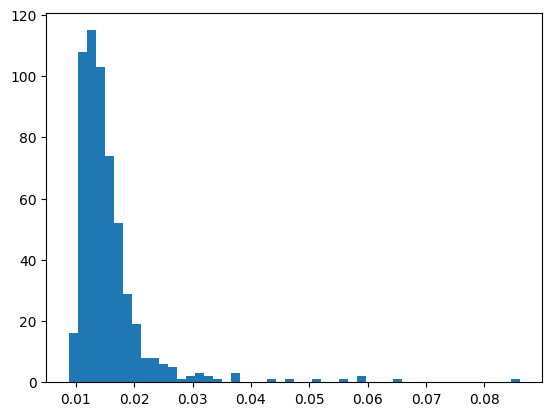

In [47]:
mae_vector = get_error_term(reconstructions,normal_test_data, _rmse=False)
train_loss=tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(mae_vector , bins=50)
threshold=np.mean(mae_vector)+2.3*np.std(mae_vector)

14/14 [==============================] - 1s 36ms/step


(array([ 1.,  0.,  2.,  5.,  6.,  9., 21., 34., 44., 53., 57., 55., 37.,
        24., 17., 11.,  9.,  3.,  4.,  6.,  5.,  5., 10.,  5.,  1.,  0.,
         2.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([0.02370873, 0.02571507, 0.02772142, 0.02972776, 0.0317341 ,
        0.03374045, 0.03574679, 0.03775313, 0.03975948, 0.04176582,
        0.04377216, 0.0457785 , 0.04778485, 0.04979119, 0.05179753,
        0.05380388, 0.05581022, 0.05781656, 0.05982291, 0.06182925,
        0.06383559, 0.06584193, 0.06784828, 0.06985462, 0.07186096,
        0.07386731, 0.07587365, 0.07787999, 0.07988634, 0.08189268,
        0.08389902, 0.08590536, 0.08791171, 0.08991805, 0.09192439,
        0.09393074, 0.09593708, 0.09794342, 0.09994977, 0.10195611,
        0.10396245, 0.1059688 , 0.10797514, 0.10998148, 0.11198782,
        0.11399417, 0.11600051, 0.11800685, 0.1200132 , 0.12201954,
        0.12402588]),
 <BarContainer

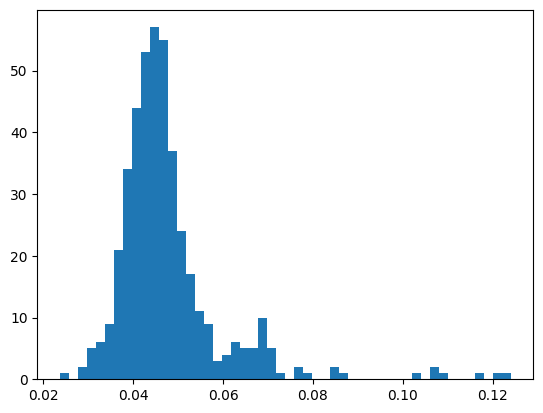

In [48]:
reconstructions_an=vae_model.predict(anomaly_test_data)
mae_vector_an = get_error_term(reconstructions_an,anomaly_test_data, _rmse=False)
plt.hist(mae_vector_an , bins=50)

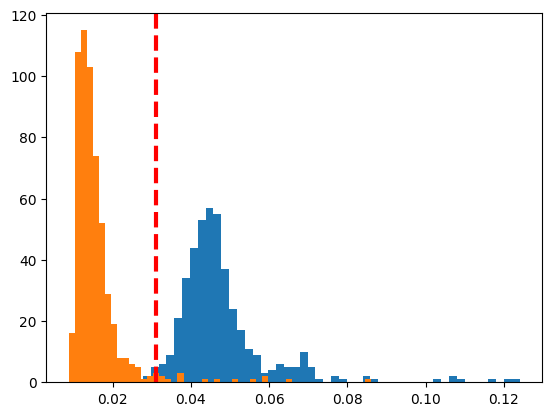

In [49]:
plt.hist(mae_vector_an , bins=50,label='abnormal')
plt.hist(mae_vector , bins=50, label='normal')
plt.axvline(threshold,color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.show()

In [50]:
reconstructions_asc=vae_model.predict(test_data_scaled)
mae_vector_an = get_error_term(reconstructions_asc,test_data_scaled, _rmse=False)
anomalies = (mae_vector_an > threshold)

32/32 [==============================] - 2s 70ms/step


In [51]:
np.count_nonzero(anomalies) / len(anomalies)

0.446

In [52]:
print(classification_report(test_labels, anomalies))
X_pred = vae_model.predict(normal_test_data)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       563
         1.0       0.96      0.98      0.97       437

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.97      0.98      1000

18/18 [==============================] - 1s 67ms/step


In [53]:
reconstructions=vae_model.predict(normal_test_data)

18/18 [==============================] - 1s 56ms/step


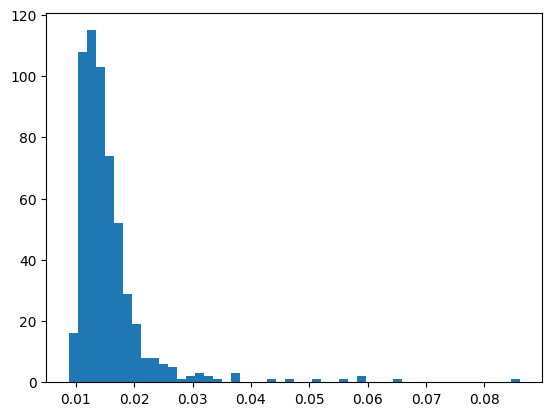

In [54]:
mae_vector = get_error_term(reconstructions,normal_test_data, _rmse=False)
train_loss=tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(mae_vector , bins=50)
threshold=np.mean(mae_vector)+.5*np.std(mae_vector)

14/14 [==============================] - 1s 36ms/step


(array([ 1.,  0.,  2.,  5.,  6.,  9., 21., 34., 44., 53., 57., 55., 37.,
        24., 17., 11.,  9.,  3.,  4.,  6.,  5.,  5., 10.,  5.,  1.,  0.,
         2.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([0.02370873, 0.02571507, 0.02772142, 0.02972776, 0.0317341 ,
        0.03374045, 0.03574679, 0.03775313, 0.03975948, 0.04176582,
        0.04377216, 0.0457785 , 0.04778485, 0.04979119, 0.05179753,
        0.05380388, 0.05581022, 0.05781656, 0.05982291, 0.06182925,
        0.06383559, 0.06584193, 0.06784828, 0.06985462, 0.07186096,
        0.07386731, 0.07587365, 0.07787999, 0.07988634, 0.08189268,
        0.08389902, 0.08590536, 0.08791171, 0.08991805, 0.09192439,
        0.09393074, 0.09593708, 0.09794342, 0.09994977, 0.10195611,
        0.10396245, 0.1059688 , 0.10797514, 0.10998148, 0.11198782,
        0.11399417, 0.11600051, 0.11800685, 0.1200132 , 0.12201954,
        0.12402588]),
 <BarContainer

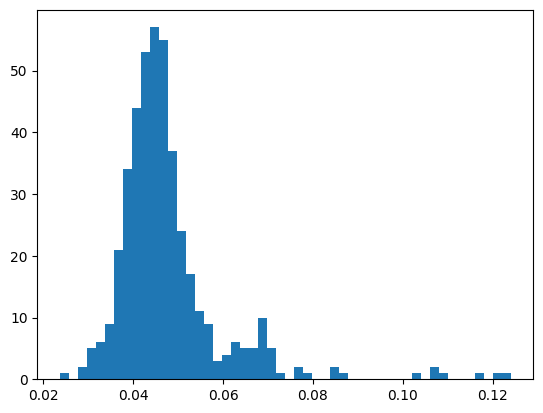

In [55]:
reconstructions_an=vae_model.predict(anomaly_test_data)
mae_vector_an = get_error_term(reconstructions_an,anomaly_test_data, _rmse=False)
plt.hist(mae_vector_an , bins=50)

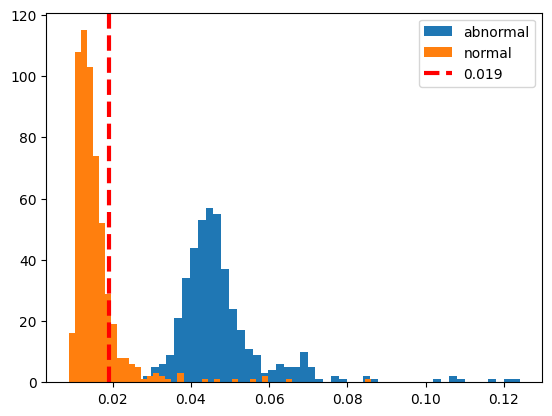

In [56]:
plt.hist(mae_vector_an , bins=50,label='abnormal')
plt.hist(mae_vector , bins=50, label='normal')
plt.axvline(threshold,color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [57]:
X_pred = vae_model.predict(normal_test_data)

18/18 [==============================] - 1s 57ms/step


In [58]:
reconstructions=vae_model.predict(normal_test_data)

18/18 [==============================] - 1s 68ms/step


In [59]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

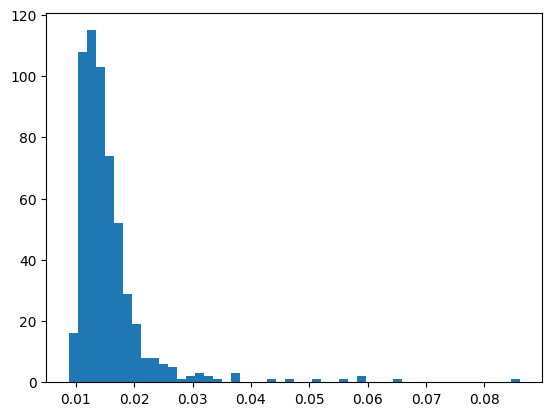

In [60]:
mae_vector = get_error_term(reconstructions,normal_test_data, _rmse=False)
train_loss=tf.keras.losses.mae(reconstructions, normal_test_data)
plt.hist(mae_vector , bins=50)
threshold=np.mean(mae_vector)+2.3*np.std(mae_vector)

In [61]:
reconstructions_an=vae_model.predict(anomaly_test_data)
mae_vector_an = get_error_term(reconstructions_an,anomaly_test_data, _rmse=False)

14/14 [==============================] - 1s 64ms/step


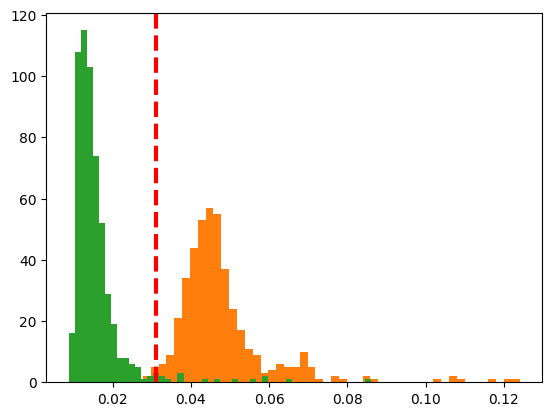

In [62]:
plt.hist(mae_vector_an , bins=50)
plt.hist(mae_vector_an , bins=50,label='abnormal')
plt.hist(mae_vector , bins=50, label='normal')
plt.axvline(threshold,color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.show()

In [63]:
reconstructions_asc=vae_model.predict(test_data_scaled)
mae_vector_an = get_error_term(reconstructions_asc,test_data_scaled, _rmse=False)
anomalies = (mae_vector_an > threshold)

32/32 [==============================] - 2s 59ms/step


In [64]:
np.count_nonzero(anomalies) / len(anomalies)

0.446

In [65]:
print(classification_report(test_labels, anomalies))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       563
         1.0       0.96      0.98      0.97       437

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.97      0.98      1000



#XAI Module

---

In [66]:
x1=reconstructions_an[284]
x2=anomaly_test_data[284]
y=[1,2,3,4]

In [67]:
def Average(lst):
    return abs(sum(lst) / 10)

In [68]:
window_size=10
subwindows=int(140/window_size)
subgraphs=int(subwindows/2)
la=0
up=window_size
ps=0
percentaget=[0]*subwindows
error = [0]*140
error_re = [0]*140
first=1

In [70]:
for x in range(subwindows):
  total_loss_error= abs(np.square(np.subtract(x2,x1)).mean())
  x3= abs( np.square(np.subtract(x2[la:up],x1[la:up])).mean())
  if first==1:
    ps=x3
    first=2
  if x3>=ps:
    print(x3," is greater",ps)
    print("limits:", la, up )
    rs=x2[la:up]
    u_la=la
    u_up=up
    percentage=x3
    ps=x3

  percentaget[x]=x3
  print("loss of window",x3)
  remaining_loss= (total_loss_error-x3)
  print("remaining loss",remaining_loss)
  if remaining_loss>threshold:
    print("culprit")
  else:
    la=la+window_size
    up=up+window_size

0.0036353800779463006  is greater 0.0036353800779463006
limits: 0 10
loss of window 0.0036353800779463006
remaining loss -0.0015399590139206533
loss of window 0.002132323965525949
remaining loss -3.690290150030161e-05
loss of window 0.0009440415930313317
remaining loss 0.0011513794709943157
loss of window 0.0001898037911924191
remaining loss 0.0019056172728332283
loss of window 0.0006755511461960255
remaining loss 0.0014198699178296218
0.006307408741238517  is greater 0.0036353800779463006
limits: 50 60
loss of window 0.006307408741238517
remaining loss -0.0042119876772128695
loss of window 0.002190858392274583
remaining loss -9.543732824893571e-05
loss of window 0.0007732682577241542
remaining loss 0.001322152806301493
loss of window 0.0005991649658294901
remaining loss 0.0014962560981961572
loss of window 0.00032139818104882386
remaining loss 0.0017740228829768235
loss of window 0.0026701432191621843
remaining loss -0.000574722155136537
loss of window 0.0013764609732578909
remaining 

Percentage of Error by the segment 0.006307408741238517
Threshold: 0.031214579447999616
Reconstruction loss for given sample: 0.0020954210640256473


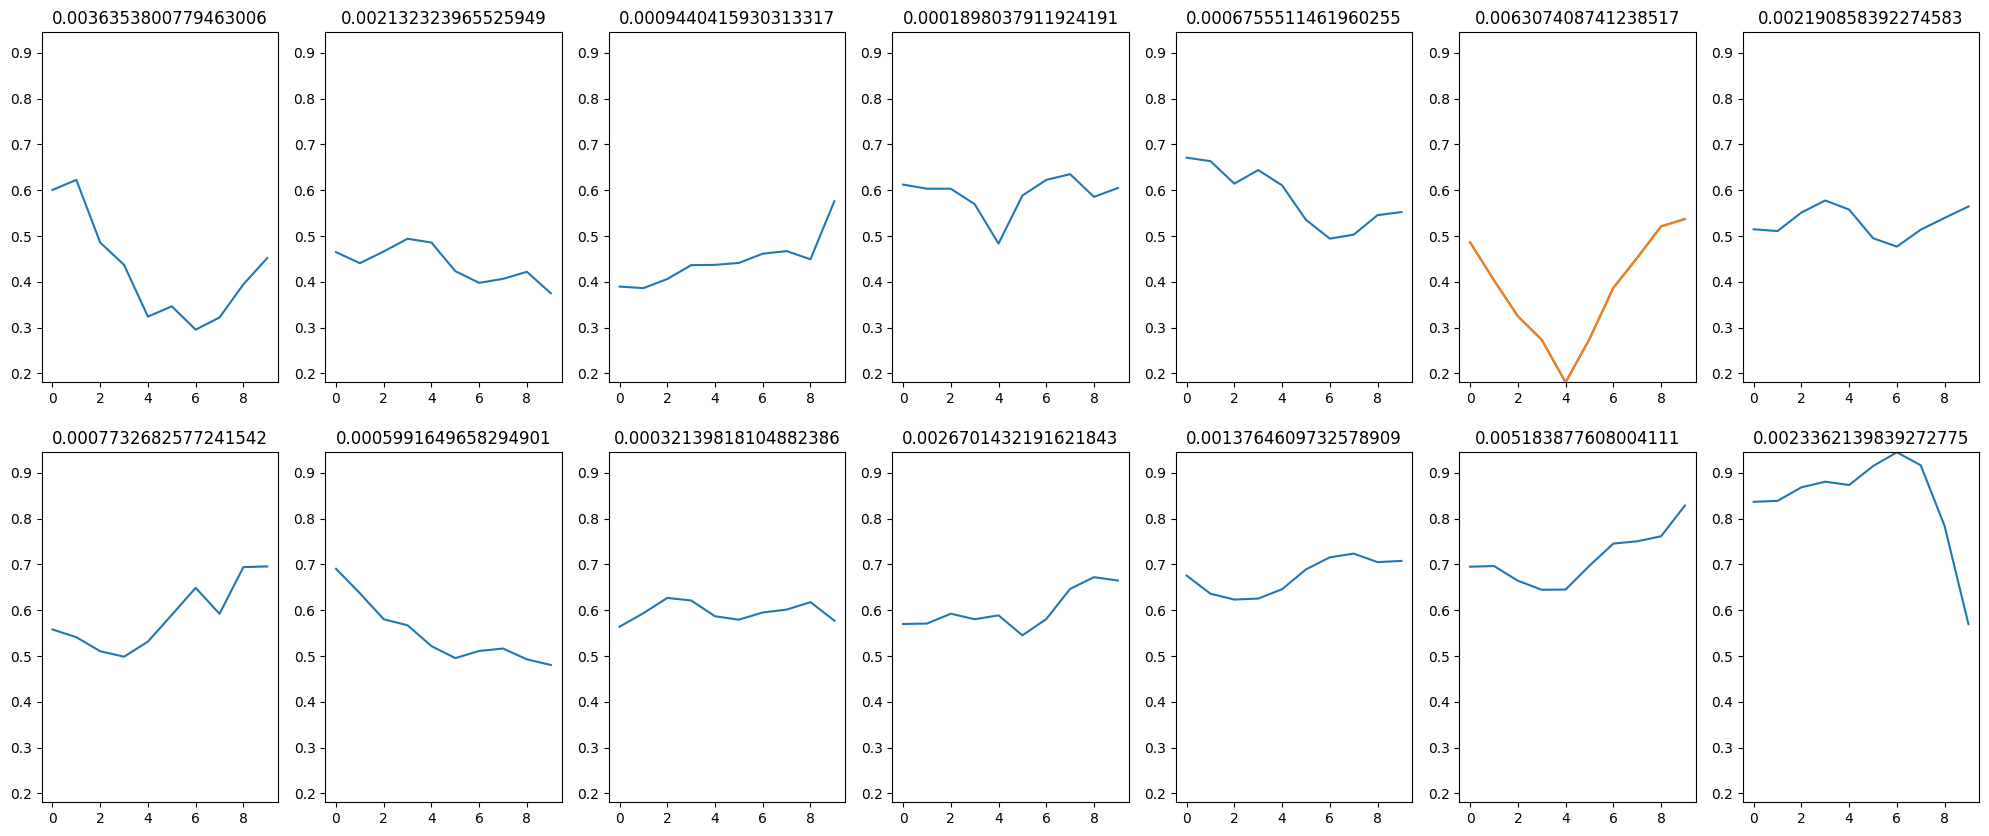

In [75]:
error[u_la:u_up]=rs
#error_re[u_la:u_up]=x1[u_la:u_up]
#plt.plot(x2, label='origional')
la=0
up=window_size
fig = plt.figure(figsize=(25, 10))
for j in range(subwindows):
  plt.subplot(2, subgraphs, (j+1))
  ax = plt.gca()
  ax.set_ylim([min(x2), max(x2)])
  plt.plot(x2[la:up])

  if la==u_la:
    plt.subplot(2, 7, (j+1))
    plt.plot(error[la:up])

  plt.title(percentaget[j])
  la=la+window_size
  up=up+window_size
#plt.plot(error, label='predicted')
#plt.axvspan(u_la,u_up, color='red', alpha=0.5)
#plt.plot(error_re)
#plt.legend()
#plt.show
print("Percentage of Error by the segment",percentage)
print("Threshold:", threshold)
print("Reconstruction loss for given sample:", total_loss_error)


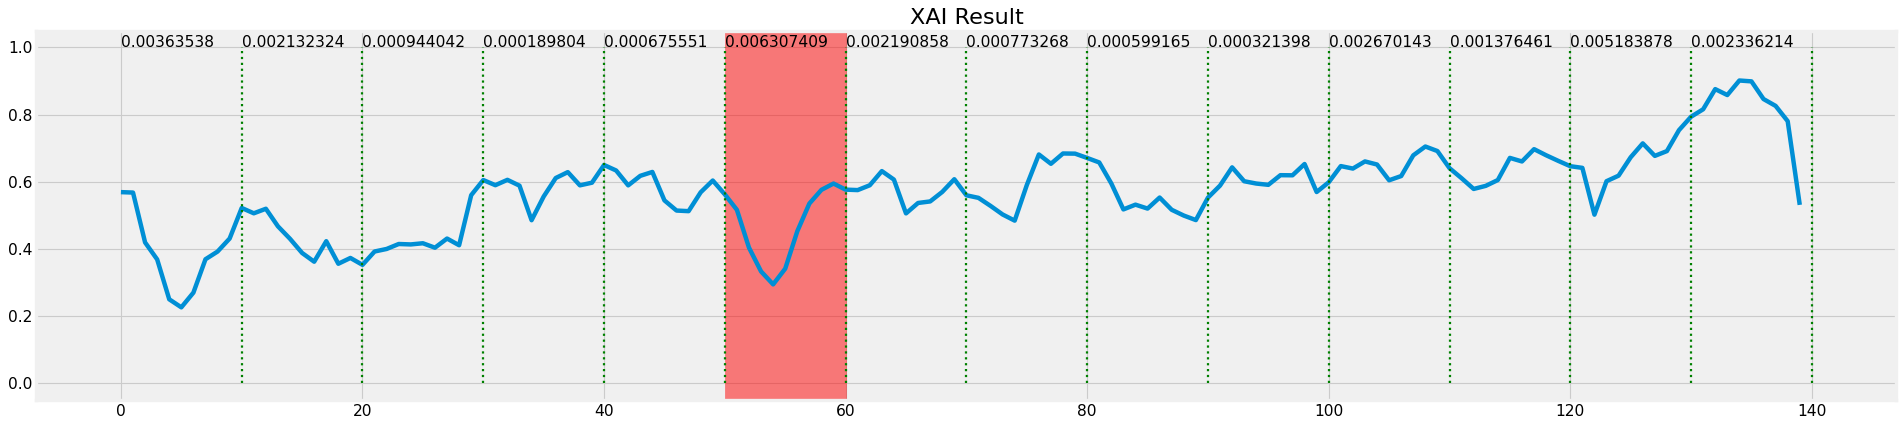

In [76]:
figure(figsize=(30, 6), dpi=80)
window_size=10
subwindows=int(140/window_size)
subgraphs=int(subwindows/2)
la=0
up=window_size
ps=0


first=1
with plt.style.context('fivethirtyeight'):
  ax=plt.plot(x1)


  for j in range(subwindows):
    plt.vlines(x=up, ymin=0, ymax=1, colors='green', ls=':', lw=2, label='vline_single - partial height')
    plt.text(la,1, str(round(percentaget[j],9)))




    plt.title('XAI Result')
    la=la+window_size
    up=up+window_size
  max_index_col = np.argmax(percentaget, axis=0)
  a=10*max_index_col
  b=10*max_index_col+window_size
  plt.axvspan(a, b, color='red', alpha=0.5)

# SVDD With Gaussian Kernel and Grid Search for bandwidth

---

In [85]:
from cvxopt import matrix, solvers

In [86]:
import sklearn

In [88]:
class SVDD():

    def __init__(self, parameters):

        """
        DESCRIPTION

        --------------------------------------------------
        INPUT
          parameters
             "positive penalty": positive penalty factor
             "negative penalty": negative penalty factor
             "kernel"          : kernel function
             "option"          : some options


        """
        self.parameters = parameters



    def train(self, data, label):

        """
        DESCRIPTION

        Train SVDD model

        --------------------------------------------------
        Reference
        Tax, David MJ, and Robert PW Duin.
        "Support vector data description."
        Machine learning 54.1 (2004): 45-66.

        --------------------------------------------------
        model = train(data, label)

        --------------------------------------------------
        INPUT
        data        Training data (n*d)
                        n: number of samples
                        d: number of features
        label       Training label (n*1)
                        positive: 1
                        negative: -1

        OUTPUT
        model       SVDD hypersphere
        --------------------------------------------------

        """
        start_time = time.time()

        label = np.array(label, dtype = 'int')
        if np.abs(np.sum(label)) == data.shape[0]:
            self.labeltype = 'single'
        else:
            self.labeltype = 'hybrid'

        # index of positive and negative samples
        pIndex = label[:,0] == 1
        nIndex = label[:,0] == -1

        # threshold for support vectors
        threshold = 1e-7

        # compute the kernel matrix
        K = self.getMatrix(data, data)

        # solve the Lagrange dual problem
        alf, obj, iteration = self.quadprog(K, label)

        # find the index of support vectors
        sv_index = np.where(alf > threshold)[0][:]

        # support vectors and alf
        sv_value = data[sv_index, :]
        sv_alf = alf[sv_index]

        # compute the center of initial feature space
        center = np.dot(alf.T, data)

        ''''
        compute the radius: eq(15)

        The distance from any support vector to the center of
        the sphere is the hypersphere radius.
        Here take the 1st support vector as an example.

        '''
        # the 1st term in eq(15)
        used = 0
        term_1 = K[sv_index[used], sv_index[used]]

        # the 2nd term in eq(15)
        term_2 = -2*np.dot(K[sv_index[used], :], alf)

        # the 3rd term in eq(15)
        term_3 = np.dot(np.dot(alf.T, K), alf)

        # R
        radius = np.sqrt(term_1+term_2+term_3)

        end_time = time.time()
        timecost = end_time - start_time

        # numbers of positive and negative samples
        pData = np.sum(pIndex)/data.shape[0]
        nData = np.sum(nIndex)/data.shape[0]

        # number of support vectors
        nSVs = sv_index.shape[0]

        # radio of  support vectors
        rSVs = nSVs/data.shape[0]

        # store the results
        self.model = {"data"      : data        ,
                      "sv_alf"    : sv_alf      ,
                      "radius"    : radius      ,
                      "sv_value"  : sv_value    ,
                      "sv_index"  : sv_index    ,
                      "nSVs"      : nSVs        ,
                      "center"    : center      ,
                      "term_3"    : term_3      ,
                      "alf"       : alf         ,
                      "K"         : K           ,
                      "pIndex"    : pIndex      ,
                      "nIndex"    : nIndex      ,
                      "obj"       : obj         ,
                      "iteration" : iteration   ,
                      "timecost"  : timecost    ,
                      "pData"     : pData       ,
                      "nData"     : nData       ,
                      "rSVs"      : rSVs        ,
                      }

        # compute the training accuracy
        display_ = self.parameters["option"]["display"]
        self.parameters["option"]["display"] = 'off'
        _, accuracy = self.test(data, label)
        self.parameters["option"]["display"] = display_
        self.model["accuracy"] = accuracy

        # display training results
        if self.parameters["option"]["display"] == 'on':
            print('\n')
            print('*** SVDD model training finished ***\n')
            print('iter             = %d'       % self.model["iteration"])
            print('time cost        = %.4f s'   % self.model["timecost"])
            print('obj              = %.4f'     % self.model["obj"])
            print('pData            = %.4f %%'  % (100*self.model["pData"]))
            print('nData            = %.4f %%'  % (100*self.model["nData"]))
            print('nSVs             = %d'       % self.model["nSVs"])
            print('radio of nSVs    = %.4f %%'  % (100*self.model["rSVs"]))
            print('accuracy         = %.4f %%'  % (100*self.model["accuracy"]))
            print('\n')

    def test(self, data, label):

        """
        DESCRIPTION

        Test the testing data using the SVDD model

        distance = test(model, Y)

        --------------------------------------------------
        INPUT
        data        Test data (n*d)
                        n: number of samples
                        d: number of features
        label       Test label (n*1)
                        positive: 1
                        negative: -1

        OUTPUT
        distance    Distance between the test data and hypersphere
        --------------------------------------------------

        """

        start_time = time.time()
        n = data.shape[0]

        # compute the kernel matrix
        K = self.getMatrix(data, self.model["data"])

        # the 1st term
        term_1 = self.getMatrix(data, data)

        # the 2nd term
        tmp_1 = -2*np.dot(K, self.model["alf"])
        term_2 = np.tile(tmp_1, (1, n))

        # the 3rd term
        term_3 =  self.model["term_3"]

        # distance
        distance = np.sqrt(np.diagonal(term_1+term_2+term_3))

        # predicted label
        predictedlabel = np.mat(np.ones(n)).T
        fault_index = np.where(distance > self.model["radius"])[1][:]
        predictedlabel[fault_index] = -1

        # compute prediction accuracy
        accuracy = np.sum(predictedlabel == label)/n

        end_time = time.time()
        timecost = end_time - start_time
        if self.parameters["option"]["display"] == 'on':
        # display test results
            print('\n')
            print('*** SVDD model test finished ***\n')
            print('time cost        = %.4f s'   % timecost)
            print('accuracy         = %.4f %%'  % (100*accuracy))
            print('\n')


        return distance, accuracy

    def quadprog(self, K, label):

        """
        DESCRIPTION

        Solve the Lagrange dual problem

        quadprog(self, K, label)

        --------------------------------------------------
        INPUT
        K         Kernel matrix
        label     training label


        OUTPUT
        alf       Lagrange multipliers

        --------------------------------------------------

        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b
        --------------------------------------------------

        """
        solvers.options['show_progress'] = False

        label = np.mat(label)
        K = np.multiply(label*label.T, K)

        # P
        n = K.shape[0]
        P = K+K.T

        # q
        q = -np.multiply(label, np.mat(np.diagonal(K)).T)

        # G
        G1 = -np.eye(n)
        G2 = np.eye(n)
        G = np.append(G1, G2, axis=0)

        # h
        h1 = np.mat(np.zeros(n)).T # lb
        h2 = np.mat(np.ones(n)).T
        if self.labeltype == 'single':
            h2[label == 1] = self.parameters["positive penalty"]

        if self.labeltype == 'hybrid':
            h2[label == 1] = self.parameters["positive penalty"]
            h2[label == -1] = self.parameters["negative penalty"]


        h = np.append(h1, h2, axis=0)

        # A, b
        A = np.mat(np.ones(n))
        b = 1.

        #
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A)
        b = matrix(b)

        #
        sol =solvers.qp(P, q, G, h, A, b)
        alf = np.array(sol['x'])
        obj = np.array(sol['dual objective'])
        iteration = np.array(sol['iterations'])

        return alf, obj, iteration

    def getMatrix(self, X, Y):

        """
        DESCRIPTION

        Compute kernel matrix

        K = getMatrix(X, Y)

        --------------------------------------------------
        INPUT
        X         data (n*d)
        Y         data (m*d)
        OUTPUT
        K         kernel matrix
        --------------------------------------------------


        type   -

        linear :  k(x,y) = x'*y+c
        poly   :  k(x,y) = (x'*y+c)^d
        gauss  :  k(x,y) = exp(-s*||x-y||^2)
        tanh   :  k(x,y) = tanh(g*x'*y+c)
        lapl   :  k(x,y) = exp(-s*||x-y||)

        degree -  d
        offset -  c
        width  -  s
        gamma  -  g

        --------------------------------------------------
        ker    -

        ker = {"type": 'gauss', "width": s}
        ker = {"type": 'linear', "offset": c}
        ker = {"type": 'ploy', "degree": d, "offset": c}
        ker = {"type": 'tanh', "gamma": g, "offset": c}
        ker = {"type": 'lapl', "width": s}

        """
        def gaussFunc():

            if self.parameters["kernel"].__contains__("width"):
                s =  self.parameters["kernel"]["width"]
            else:
                s = 2
            K = sklearn.metrics.pairwise.rbf_kernel(X, Y, gamma=s)


            return K

        def linearFunc():

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 0

            K = sklearn.metrics.pairwise.linear_kernel(X, Y)+c

            return K

        def ployFunc():
            if self.parameters["kernel"].__contains__("degree"):
                d =  self.parameters["kernel"]["degree"]
            else:
                d = 2

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 0

            K = sklearn.metrics.pairwise.polynomial_kernel(X, Y, degree=d, gamma=None, coef0=c)

            return K

        def laplFunc():

            if self.parameters["kernel"].__contains__("width"):
                s =  self.parameters["kernel"]["width"]
            else:
                s = 2
            K = sklearn.metrics.pairwise.laplacian_kernel(X, Y, gamma=s)

            return K

        def tanhFunc():
            if self.parameters["kernel"].__contains__("gamma"):
                g =  self.parameters["kernel"]["gamma"]
            else:
                g = 0.01

            if self.parameters["kernel"].__contains__("offset"):
                c =  self.parameters["kernel"]["offset"]
            else:
                c = 1

            K = sklearn.metrics.pairwise.sigmoid_kernel(X, Y, gamma=g, coef0=c)

            return K

        kernelType = self.parameters["kernel"]["type"]
        switcher = {
                        "gauss"   : gaussFunc  ,
                        "linear"  : linearFunc ,
                        "ploy"    : ployFunc   ,
                        "lapl"    : laplFunc   ,
                        "tanh"    : tanhFunc   ,
                     }

        return switcher[kernelType]()

In [89]:
class Visualization():

    def testResult(svdd, distance):

        """
        DESCRIPTION

        Plot the test results

        testResult(model, distance)

        ---------------------------------------------------------------

        INPUT
        svdd             SVDD hypersphere
        distance         distance from test data to SVDD hypersphere

        ---------------------------------------------------------------

        """
        plt.rcParams['font.size'] = 15
        n = distance.shape[0]

        fig = plt.figure(figsize = (10, 6))
        ax = fig.add_subplot(1, 1, 1)
        radius = np.ones((n, 1))*svdd.model["radius"]
        ax.plot(radius,
                color ='r',
                linestyle = '-',
                marker = 'None',
                linewidth = 2,
                markeredgecolor ='k',
                markerfacecolor = 'w',
                markersize = 6)

        ax.plot(distance,
                color = 'k',
                linestyle = ':',
                marker='o',
                linewidth=1,
                markeredgecolor = 'k',
                markerfacecolor = 'C4',
                markersize = 6)

        ax.set_xlabel('Samples')
        ax.set_ylabel('Distance')

        ax.legend(["Radius","Distance"],
                  ncol = 1, loc = 0,
                  edgecolor = 'black',
                  markerscale = 2, fancybox = True)

        plt.show()

    def testROC(label, distance):
        """
        DESCRIPTION

        Plot the test ROC

        testROC(label, distance)

        ---------------------------------------------------------------

        INPUT
        label            test label
        distance         distance from test data to SVDD hypersphere

        ---------------------------------------------------------------

        """
        if np.abs(np.sum(label)) == label.shape[0]:
            raise SyntaxError('Both positive and negative labels must be entered for plotting ROC curve.')

        # number of positive samples
        plt.rcParams['font.size'] = 15
        n_p = np.sum(label == 1)
        n_n = np.sum(label == -1)

        #  sort
        index = np.argsort(distance)
        label_sort = label[index]
        FP = np.cumsum(label_sort == -1)
        TP = np.cumsum(label_sort == 1)
        FPR = FP/n_n
        TPR = TP/n_p

        roc_auc = auc(FPR.T, TPR.T)

        fig = plt.figure(figsize = (6, 6))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(FPR.T, TPR.T,
                color ='C3',
                linestyle = '-',
                marker = 'None',
                linewidth = 5,
                markeredgecolor ='k',
                markerfacecolor = 'w',
                markersize = 6)

        ax.set_xlabel('False positive rate (FPR)')
        ax.set_ylabel('True positive rate (TPR)')
        ax.set_title('Area under the curve (AUC) = %.4f' %roc_auc)

        plt.grid()
        plt.show()


    def boundary(svdd, data, label, r=0.3, nn=2):
        """
        DESCRIPTION

        Plot the boundary

        boundary(svdd, data, label, r=0.3, nn=2)

        ---------------------------------------------------------------

        INPUT
        svdd             SVDD hypersphere
        data             training data
        label            training label
        r                radio of expansion (0<r<1)
        nn               number of grids

        ---------------------------------------------------------------

        """

        dim = data.shape[1]
        if dim!=2:
            raise SyntaxError('Visualization of decision boundary only supports for 2D data')

        # compute the range of grid
        numGrids = np.rint(data.shape[0]/nn).astype(int)  # number of grids
        x_range = np.zeros(shape=(numGrids, 2))
        for i in range(2):
            _tmp_ = (np.max(data[:, i])-np.min(data[:, i]))*r
            xlim_1 = np.min(data[:, i])-_tmp_
            xlim_2 = np.max(data[:, i])+_tmp_
            x_range[:, i] = np.linspace(xlim_1, xlim_2, numGrids)

        # grid
        xv, yv = np.meshgrid(x_range[:, 0], x_range[:, 1])

        num1 = xv.shape[0]
        num2 = yv.shape[0]
        distance = np.zeros(shape=(num1, num1))

        # calculate the grid scores
        print("Calculating the grid (%04d*%04d) scores...\n" %(num1, num2))

        display_ = svdd.parameters["option"]["display"]
        svdd.parameters["option"]["display"] = 'off'
        start_time = time.time()
        for i in range(num1):
            for j in range(num2):
                tmp = np.mat([xv[i, j], yv[i, j]])
                distance[i, j], _ = svdd.test(tmp, 1)
                # print('[feature 1: %06d]  [feature 2: %06d] \n' % (i+1,j+1))
        end_time = time.time()
        print('Grid scores completed. Time cost %.4f s\n' % (end_time-start_time))
        svdd.parameters["option"]["display"] = display_

        # plot the contour (3D)
        fig = plt.figure(figsize = (20, 6))

        ax3 = fig.add_subplot(1, 3, 1, projection='3d')
        # ax3 = ax3.axes(projection='3d')
        ada = ax3.plot_surface(xv, yv, distance, cmap=plt.cm.jet)
        ax3.contourf(xv, yv, distance, zdir='z', offset=np.min(distance)*0.9, cmap=plt.cm.coolwarm)
        ax3.set_zlim(np.min(distance)*0.9, np.max(distance)*1.05)
        # plt.colorbar(ada)



        # plot the contour (2D)
        # fig = plt.figure(figsize = (10, 8))
        ax1 = fig.add_subplot(1, 3, 2)

        ctf1 = ax1.contourf(xv, yv, distance, alpha = 0.8, cmap=plt.cm.jet)
        ctf2 = ax1.contour(xv, yv, distance, colors='black', linewidths=1)
        plt.clabel(ctf2, inline=True)
        # plt.colorbar(ctf1)

        # plot the boundary
        # fig = plt.figure(figsize = (10, 8))
        ax2 = fig.add_subplot(1, 3, 3)

        if svdd.labeltype == 'single':

            ax2.scatter(data[:,0], data[:,1],
                        color='green',marker='o',
                        edgecolor='black',alpha=0.5, zorder = 2)
            ax2.scatter(data[svdd.model["sv_index"],0], data[svdd.model["sv_index"],1],
                    facecolor='C2',marker='o',s = 144,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.contour(xv, yv, distance,[svdd.model["radius"]],
                              colors='C3', linewidths=5, zorder = 1)

            ax2.legend(["Training data", "Support vectors"],
                      ncol = 1, loc = 0,
                      edgecolor = 'black',markerscale = 1.2, fancybox = True)

        else:
            ax2.scatter(data[svdd.model["pIndex"],0], data[svdd.model["pIndex"],1],
                    facecolor='C0',marker='o', s = 100,linewidths = 2,
                    edgecolor='black', zorder = 2)
            ax2.scatter(data[svdd.model["nIndex"],0], data[svdd.model["nIndex"],1],
                    facecolor='C4',marker='s',s = 100,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.scatter(data[svdd.model["sv_index"],0], data[svdd.model["sv_index"],1],
                    facecolor='C2',marker='o',s = 144,linewidths = 2,
                    edgecolor='black', zorder = 2)

            ax2.contour(xv, yv, distance,[svdd.model["radius"]],
                              colors='C3', linewidths=5, zorder = 1)

            ax2.legend(["Training data (+)","Training data (-)", "Support vectors"],
                      ncol = 1, loc = 0,
                      edgecolor = 'black',markerscale = 1.2, fancybox = True)

        plt.show()

In [79]:
train_lanel=np.where(train_labels==1, -1,train_labels)
train_lanel2=np.where(train_lanel==0, 1,train_lanel)
test_lanel=np.where(test_labels==1, -1,test_labels)
test_lanel2=np.where(test_lanel==0, 1,test_lanel)

In [80]:
predicted_train = vae_model.predict(train_data_scaled)
predicted = vae_model.predict(test_data_scaled)

params = {'bandwidth': np.linspace(3, 0.2, 10)}
grid = GridSearchCV(KernelDensity(), params, cv = 30)

e=(train_data_scaled- predicted_train)/np.max(train_data_scaled- predicted_train)
nsamples, nx, ny = e.shape
d2_e = e.reshape((nsamples,nx*ny))

32/32 [==============================] - 1s 36ms/step


In [81]:
#--------------Error Vectors Normal
predicted_nor = vae_model.predict(normal_train_data)
e3=(normal_train_data- predicted_nor)/np.max(normal_train_data- predicted_nor)
nsamples, nx, ny = e3.shape
d2_e3 = e3.reshape((nsamples,nx*ny))
#  Grid for best h (bandwidth)
grid.fit(d2_e3)

h=grid.best_estimator_.bandwidth

# Calculate Error Vectors
e1=(test_data_scaled - predicted)/np.max(test_data_scaled - predicted)
nsamples1, nx1, ny1 = e1.shape
d2_e1 = e1.reshape((nsamples1,nx1*ny1))

74/74 [==============================] - 6s 73ms/step


In [82]:
# kernel list
kernelList = {#"1": {"type": 'gauss', "width": 0.05},
              #"2": {"type": 'linear', "offset": 0},
              #"3": {"type": 'ploy', "degree": 2, "offset": 0},
              #"4": {"type": 'tanh', "gamma": 1e-4, "offset": 0},
              "1": {"type": 'lapl', "width": h}
              }



*** SVDD model training finished ***

iter             = 13
time cost        = 95.3997 s
obj              = -0.9580
pData            = 58.9000 %
nData            = 41.1000 %
nSVs             = 76
radio of nSVs    = 1.9000 %
accuracy         = 97.2750 %




*** SVDD model test finished ***

time cost        = 0.6542 s
accuracy         = 97.9000 %




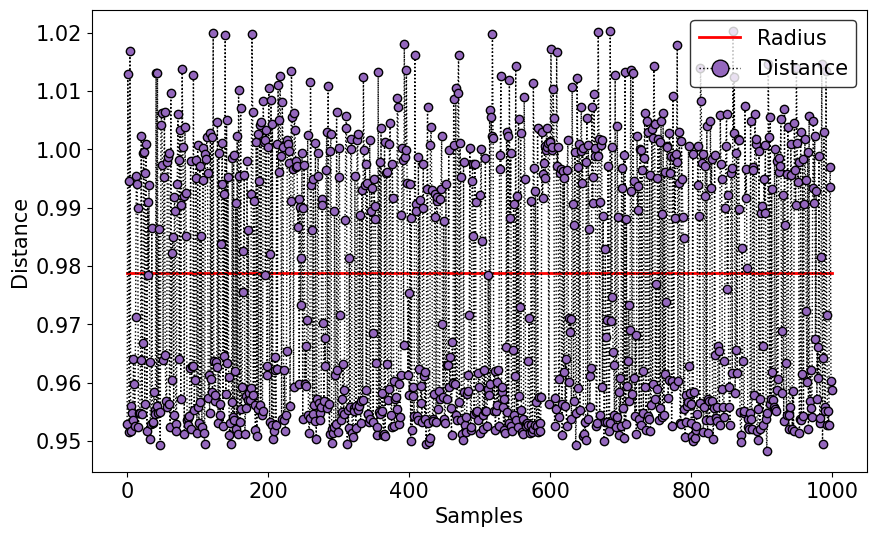

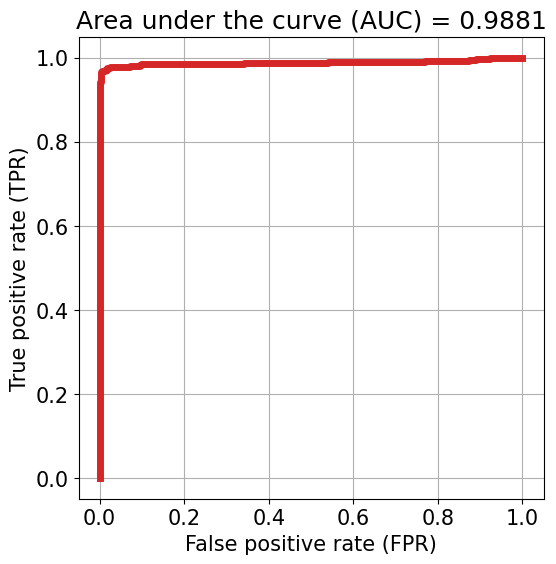

In [90]:
for i in range(len(kernelList)):

    # set SVDD parameters
    parameters = {"positive penalty": 0.9,
                  "negative penalty": 0.7,
                  "kernel": kernelList.get(str(i+1)),
                  "option": {"display": 'on'}}

    # construct an SVDD model
    svdd = SVDD(parameters)

    # train SVDD model
    svdd.train(d2_e, train_lanel2)

    # test SVDD model
    distance, accuracy = svdd.test(d2_e1, test_lanel2)

    # visualize the results
    Visualization.testResult(svdd, distance)
    Visualization.testROC(test_lanel2, distance)
    # this will work incase your data is two dimensional
    #Visualization.boundary(svdd, d2_e, train_labels)